In [ ]:
### PASTING CODE INTO THIS DOCUMENT AS I ORIGINALLY COMPLETED IT UNDER MY PERSONAL EMAIL ACCOUNT ###

In [ ]:
# PYTHON MODULES
# User-installed modules
!pip install pandas_bokeh
 
# import pre-installed and user-installed modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas_bokeh  # user-installed
 
 
# pandas options
pd.set_option('display.max_rows', 100)
pd.set_option('plotting.backend', 'pandas_bokeh')
pandas_bokeh.output_notebook()

In [ ]:
!wget -nc 'https://raw.githubusercontent.com/uscprofessor/itp487_enterprise_data_analytics/main/data/personality_data_spring_2022.csv'
personality_raw = pd.read_csv('personality_data_spring_2022.csv')

--2022-05-01 13:02:42--  https://raw.githubusercontent.com/uscprofessor/itp487_enterprise_data_analytics/main/data/personality_data_spring_2022.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6792 (6.6K) [text/plain]
Saving to: ‘personality_data_spring_2022.csv’

personality_data_sp 100%[===================>]   6.63K  --.-KB/s    in 0s      

2022-05-01 13:02:43 (77.3 MB/s) - ‘personality_data_spring_2022.csv’ saved [6792/6792]



In [ ]:
personality_raw.shape

(128, 11)

In [ ]:
personality_raw

,Personality,Grad_Year,Class,GPA,Transfer,International,Aca_Exp,Social_Exp,Merit_Scholarships,USC_Exp,Sex
0,ISTJ-A,2024,Sophmore,> 3.6,No,Yes,4,4,0%,4,Male
1,ENTP-T,2024,Sophmore,> 3.6,No,Yes,4,3,0%,4,Male
2,INTP-A,2023,Junior,> 3.6,No,Yes,5,4,0%,4,Male
3,ENFJ-T,2022,Senior,> 3.6,No,No,4,5,0%,4,Female
4,INFJ-T,2023,Junior,> 3.6,No,No,5,3,50%,3,Female
...,...,...,...,...,...,...,...,...,...,...,...
123,ENFP-T,2023,Junior,> 3.6,No,Yes,4,5,0%,5,Female
124,ESTJ-A,2024,Sophmore,> 3.6,No,Yes,4,4,0%,4,Female
125,ESTP-T,2022,Senior,> 3.6,"Yes, from a 4 year college",Yes,3,3,50%,3,Female
126,ENTJ-A,2025,Senior,3.3-3.6,No,Yes,3,4,0%,4,Male


In [ ]:
personality = personality_raw.copy()

In [ ]:
personality = personality[['Personality', 'Grad_Year', 'USC_Exp','GPA','Sex', 'Merit_Scholarships']]

In [ ]:
personality.dropna()

,Personality,Grad_Year,USC_Exp,GPA,Sex,Merit_Scholarships
0,ISTJ-A,2024,4,> 3.6,Male,0%
1,ENTP-T,2024,4,> 3.6,Male,0%
2,INTP-A,2023,4,> 3.6,Male,0%
3,ENFJ-T,2022,4,> 3.6,Female,0%
4,INFJ-T,2023,3,> 3.6,Female,50%
...,...,...,...,...,...,...
123,ENFP-T,2023,5,> 3.6,Female,0%
124,ESTJ-A,2024,4,> 3.6,Female,0%
125,ESTP-T,2022,3,> 3.6,Female,50%
126,ENTJ-A,2025,4,3.3-3.6,Male,0%


In [ ]:
personality[personality.columns[3:]]=personality[personality.columns[3:]].apply(lambda x: x.str[0:]).astype(str)

In [ ]:
a = lambda x : str(x)[0]
personality['Extroversion'] = personality['Personality'].apply(a)

In [ ]:
personality.head(10)

,Personality,Grad_Year,USC_Exp,GPA,Sex,Merit_Scholarships,Extroversion
0,ISTJ-A,2024,4,> 3.6,Male,0%,I
1,ENTP-T,2024,4,> 3.6,Male,0%,E
2,INTP-A,2023,4,> 3.6,Male,0%,I
3,ENFJ-T,2022,4,> 3.6,Female,0%,E
4,INFJ-T,2023,3,> 3.6,Female,50%,I
5,INTJ-T,2023,3,> 3.6,Female,0%,I
6,ISTJ-A,2024,2,> 3.6,Male,0%,I
7,INFJ-T,2024,4,> 3.6,Female,0%,I
8,INTJ-T,2023,3,> 3.6,Male,0%,I
9,ENTP-T,2023,5,> 3.6,Female,0%,E


In [ ]:
print(personality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Personality         128 non-null    object
 1   Grad_Year           128 non-null    int64 
 2   USC_Exp             128 non-null    int64 
 3   GPA                 128 non-null    object
 4   Sex                 128 non-null    object
 5   Merit_Scholarships  128 non-null    object
 6   Extroversion        128 non-null    object
dtypes: int64(2), object(5)
memory usage: 7.1+ KB
None


In [ ]:
Extroversion_df = personality.loc[personality['Extroversion'] == 'E']

In [ ]:
Introversion_df = personality.loc[personality['Extroversion'] == 'I']

In [ ]:
NumberOfSexE = Extroversion_df.groupby(['Sex']).count()

In [ ]:
Sex = ['Female', 'Male']

Text(0.5, 1.0, 'Sex of Extroverted Students')

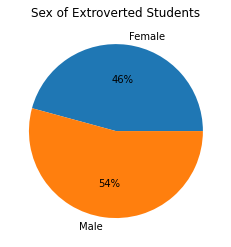

In [ ]:
import matplotlib.pyplot as plt
plt.pie(NumberOfSexE['Extroversion'], autopct='%1.0f%%',labels=Sex)
plt.title('Sex of Extroverted Students')

In [ ]:
NumberOfSexI = Introversion_df.groupby(['Sex']).count()

Text(0.5, 1.0, 'Sex of Introverted Students')

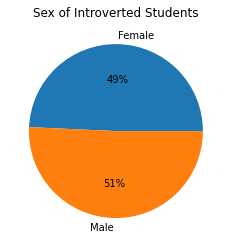

In [ ]:
import matplotlib.pyplot as plt
plt.pie(NumberOfSexI['Extroversion'], autopct='%1.0f%%',labels=Sex)
plt.title('Sex of Introverted Students')

In [ ]:
AvgExtroversion = personality.groupby(['Extroversion']).mean()

In [ ]:
print(AvgExtroversion)

                Grad_Year   USC_Exp
Extroversion                       
E             2022.644068  4.288136
I             2022.695652  3.985507


In [ ]:
Labels = ['Extroverted', 'Introverted']

Text(0, 0.5, 'Extroversion level')

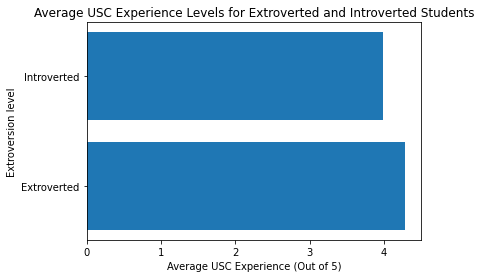

In [ ]:
plt.barh(Labels, AvgExtroversion['USC_Exp'])
plt.title("Average USC Experience Levels for Extroverted and Introverted Students")
plt.xlabel("Average USC Experience (Out of 5)")
plt.ylabel("Extroversion level")

In [ ]:
DataMart1 = personality.loc[personality['Grad_Year'] == '2022']
DataMart1 = personality.loc[personality['GPA'] == '3.3-3.6']
print(DataMart1.head())

   Personality  Grad_Year  USC_Exp      GPA     Sex Merit_Scholarships  \
12      INFJ-T       2022        4  3.3-3.6  Female                 0%   
26      INFP-A       2023        4  3.3-3.6    Male                 0%   
35      ISTJ-T       2022        4  3.3-3.6  Female                75%   
36      ENTJ-A       2022        5  3.3-3.6  Female               100%   
40      INTJ-A       2022        5  3.3-3.6  Female                25%   

   Extroversion  
12            I  
26            I  
35            I  
36            E  
40            I  


In [ ]:
DataMart2 = personality.loc[personality['Merit_Scholarships'] == '50%']
print(DataMart2.head())

   Personality  Grad_Year  USC_Exp    GPA     Sex Merit_Scholarships  \
4       INFJ-T       2023        3  > 3.6  Female                50%   
15      INTP-A       2023        5  > 3.6    Male                50%   
19      ISTJ-T       2023        4  > 3.6    Male                50%   
34      ESFJ-A       2023        4  > 3.6    Male                50%   
42      INFP-A       2022        4  > 3.6  Female                50%   

   Extroversion  
4             I  
15            I  
19            I  
34            E  
42            I  
